<a href="https://colab.research.google.com/github/FMabiala/Activation-Function-Tutorial/blob/main/FLM_ML4ThPh_Homework_6_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name: Floyd L. Mabiala**
#Date: 24/10/2023


## Question 1

###Exercise 1:
###Discussion:
 We have learned about bagging and boosting as two ensemble methods. There is a third, widely used ensemble method known as stacking, where models are layered on top of one another. We would like you to do your own research and write a short paragraph on the ***key differences between bagging, boosting, and stacking in ensemble modelling.***

###Answer:

**Introduction:**
Ensemble modeling is a powerful technique in machine learning that combines multiple models to improve predictive performance. Three popular ensemble methods are bagging, boosting, and stacking, each with its unique characteristics and objectives. This report highlights the key differences between these techniques.

**1. Bagging (Bootstrap Aggregating):**
   - *Objective*: Bagging aims to reduce variance and enhance model stability.
   - *Method*: Bagging creates subsets of the training data using bootstrapping (sampling with replacement). Multiple base models are trained on these subsets, and their predictions are aggregated through averaging or majority voting.
   - *Example Algorithm*: The Random Forest algorithm is a well-known bagging method.

**2. Boosting:**
   - *Objective*: Boosting focuses on reducing bias and increasing accuracy by emphasizing misclassified instances.
   - *Method*: Boosting iteratively trains a sequence of base models, with each model assigning higher weights to previously misclassified data points. The predictions from these models are combined through weighted voting.
   - *Example Algorithms*: Popular boosting algorithms include AdaBoost, Gradient Boosting (e.g., XGBoost, LightGBM), and CatBoost).

**3. Stacking:**
   - *Objective*: Stacking combines diverse models to leverage their strengths and enhance predictive performance.

   - *Method*: Stacking involves training multiple base models and then training a meta-model (blender) on the predictions of these base models. The meta-model learns how to combine these predictions to make final predictions.
   - *Flexibility*: Stacking offers flexibility in combining various types of models, including linear and non-linear ones, which can lead to significant performance improvements.
   - *Example Algorithms*: Gaussian Naive Bayes, and Logistic Regression

**Conclusion:**
In ensemble modelling, the choice between bagging, boosting, and stacking depends on the specific problem and dataset characteristics. Bagging aims to reduce variance, boosting aims to reduce bias, while stacking combines diverse models to maximize predictive accuracy. Understanding the distinctions between these techniques is crucial for effectively applying ensemble methods and improving model performance in various machine learning tasks.



## Question 2
**Practical:**

For this practical assignment, you are going to extend the work you did in your 1-5 classification tasks and model evaluation from lesson 5.
In addition to the Logistic Regression and Support Vector Machine classifiers which you fitted on the particle collision event data, we would like you to fit and evaluate a Random Forest classifier & Gradient Boosting Classifier in the same way, experimenting with the different hyper-parameters to optimize performance and compare its performance on the train and test sets to that of the previous two classifiers.
In particular, we would like you to identify whether or not the Random Forest classifier is overfitting, and if so, identify which hyper-parameters to tune to help you regularize the model.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# NOTE: run this cel first before you import any libraries
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Import the libraries required for the problem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support vector classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Notebook config
from sklearn import set_config
set_config(display='diagram')

##Exploratory Data Analysis & Pre-processing
1. Exploring the Data

In [ ]:
#Load the data

X_train = np.load('/content/drive/MyDrive/Colab Notebooks/X_train.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/y_train.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/y_test.npy')

In [ ]:
# Print out the shapes of the arrays to see the number of samples
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16917, 20, 20), (16917,), (7250, 20, 20), (7250,))

###Visualising the data
Let's plot a three samples from each class ("Maxwell" and "Spinodal") in the X_train set using Matplotlibs imshow() function.

Note that the labels having the following encoding in y_train and y_test:

* 0 corresponds to a Maxwell event.
* 1 corresponds to a Spinodal event.


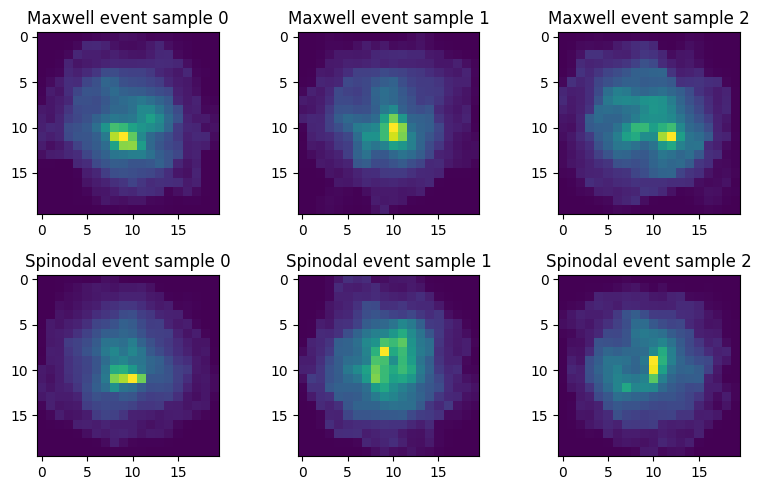

In [ ]:
# Get the first three samples per class in the train and test sets
maxwell_samples = X_train[np.where(y_train==0)[0][:3]]
spinodal_samples = X_train[np.where(y_train==1)[0][:3]]

fig, ax = plt.subplots(2,3, figsize=(8,5))
for row in range(3):
  ax[0][row].imshow(maxwell_samples[row])
  ax[1][row].imshow(spinodal_samples[row])
  ax[0][row].set_title(f"Maxwell event sample {row}")
  ax[1][row].set_title(f"Spinodal event sample {row}")
plt.tight_layout()
plt.show()

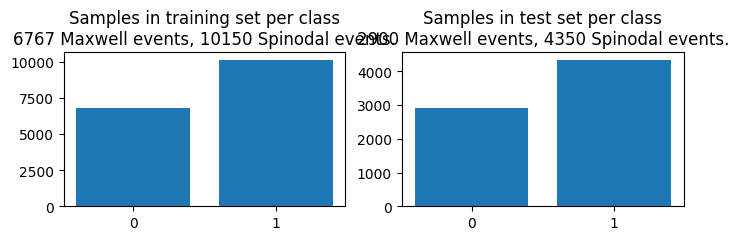

In [ ]:
# Count number of samples per class
# Note: The set label is 1 for a Spinodal event and 0 for a Maxwell event.
n_maxwell_train  = len(np.where(y_train==0)[0])
n_spinodal_train = len(np.where(y_train==1)[0])

n_maxwell_test  = len(np.where(y_test==0)[0])
n_spinodal_test = len(np.where(y_test==1)[0])

# Plot a histogram of the labels in the train and test set
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,2))
ax1.hist(y_train, bins=[-0.4, 0.4, 0.6,1.4])
ax2.hist(y_test, bins=[-0.4, 0.4, 0.6,1.4])
ax1.set_xticks([0,1])
ax2.set_xticks([0,1])
ax1.set_title(f"Samples in training set per class\n{n_maxwell_train} Maxwell events, \
{n_spinodal_train} Spinodal events.")
ax2.set_title(f"Samples in test set per class\n{n_maxwell_test} Maxwell events, \
{n_spinodal_test} Spinodal events.")
plt.show()

###Logistic Regression Model

In [ ]:
# Processing the Data
#Print out X train and X test values to see how the data looks like
print ('X train values:', X_train[:, :1])
print ('\nX test values:', X_test[:, :1])

X train values: [[[1.382e-07 1.309e-05 1.583e-04 ... 1.005e-03 8.547e-05 3.085e-06]]

 [[7.159e-05 1.084e-03 6.451e-03 ... 1.302e-03 9.498e-04 4.135e-04]]

 [[1.294e-04 1.597e-03 5.846e-03 ... 2.544e-04 2.240e-05 8.301e-07]]

 ...

 [[8.797e-05 7.500e-04 2.811e-03 ... 1.502e-03 5.929e-04 1.483e-04]]

 [[4.081e-07 1.314e-05 1.471e-04 ... 8.675e-05 1.221e-05 3.627e-06]]

 [[3.226e-04 5.548e-04 1.641e-03 ... 2.926e-04 5.583e-05 4.609e-06]]]

X test values: [[[7.308e-05 1.049e-03 5.469e-03 ... 1.559e-03 3.410e-04 4.535e-05]]

 [[9.094e-05 1.135e-03 7.271e-03 ... 4.643e-04 2.797e-05 1.206e-07]]

 [[7.479e-05 4.610e-04 1.926e-03 ... 2.326e-04 1.281e-05 1.424e-07]]

 ...

 [[9.600e-06 1.124e-04 5.731e-04 ... 1.085e-03 1.613e-04 3.624e-06]]

 [[5.527e-05 1.815e-03 1.648e-02 ... 8.739e-08 3.301e-08 0.000e+00]]

 [[1.478e-09 3.386e-05 6.009e-04 ... 2.940e-03 1.600e-03 2.614e-04]]]


###Data Exploration
When fitting and making predictions with a logistic regression/SVM models we will need to reshape (using Numpy.reshape()) each of the 2-d arrays (i.e. samples) of shape (20,20) in the X_train and X_test data to be 1-d arrays of length 400.

In [ ]:
# Make a copy of the data and reshape
X = X_train.copy()
X = X.reshape(-1,400) #reshape 16917 & 20x20 - 2D: 16917x400
X1 = X_test.reshape(-1,400)
y_test = y_test.copy()
y = y_train.copy()
print("Shape of training data array after rehshaping:", X.shape)
print('\nShape of testing data array after rehshaping:', X1.shape)

Shape of training data array after rehshaping: (16917, 400)

Shape of testing data array after rehshaping: (7250, 400)


In [ ]:
#Print the re-shaped data to be 2-D arrays
print ('X train values:', X[:, :1])
print ('\nX test values:', X1[:, :1])
print('\n X train and X test data must be at the same standard Scaler ')

X train values: [[1.382e-07]
 [7.159e-05]
 [1.294e-04]
 ...
 [8.797e-05]
 [4.081e-07]
 [3.226e-04]]

X test values: [[7.308e-05]
 [9.094e-05]
 [7.479e-05]
 ...
 [9.600e-06]
 [5.527e-05]
 [1.478e-09]]

 X train and X test data must be at the same standard Scaler 


In [ ]:
#standardization using Standardcaler using sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scal = scaler.fit_transform(X)  #transform and fit training data

xtest_scal = scaler.transform(X1) # Only transform and not fit for testing data
print ('Scaled X train data',xtrain_scal[:, :1])
print ('\nScaled X test data', xtest_scal[:, :1])

Scaled X train data [[-0.15570415]
 [-0.11521221]
 [-0.08245112]
 ...
 [-0.10592962]
 [-0.1555512 ]
 [ 0.02703587]]

Scaled X test data [[-0.11436783]
 [-0.10424651]
 [-0.11339877]
 ...
 [-0.15034212]
 [-0.12446081]
 [-0.15578163]]


##Classification using Logistic Regression Model

In [ ]:
#Fitting a LogisticRegression classifier to the training data using Scikit-Learn

from sklearn.linear_model import LogisticRegression

log_reg1 = LogisticRegression(random_state=0,solver='lbfgs', max_iter=200, C=1,
                              fit_intercept= True, penalty='l2', class_weight='balanced')

log_reg1.fit(xtrain_scal, y)

LogisticRegression(C=1, class_weight='balanced', max_iter=200, random_state=0)

In [ ]:
# Compute the model predictions on the training and testing set
train_lgr_pred = log_reg1.predict(xtrain_scal)
test_lgr_pred = log_reg1.predict(xtest_scal)

print('Prediction of x train data:', train_lgr_pred)
print('\nPrediction of x test data:', test_lgr_pred)
print('\nIt can be seen how the training and testing data have changed the 0 and 1 digits')

Prediction of x train data: [1. 1. 1. ... 1. 1. 1.]

Prediction of x test data: [1. 0. 1. ... 1. 1. 1.]

It can be seen how the training and testing data have changed the 0 and 1 digits


##Evaluate the logistic regression model performance

In imbalanced datasets, it is important to use metrics that are not biased towards the majority class, such as Recall, FPR, and F-Score

In [ ]:
# Evaluate the model performance of the model using the precision Score metric
from sklearn.metrics import f1_score

xtrn_lgr_score = f1_score(train_lgr_pred, y)
xtest_lgr_score = f1_score(test_lgr_pred, y_test)

print('The mean precision of the model predictions on the training set is:', round(100*xtrn_lgr_score,2),'%')
print('\nThe mean precision of the model predictions on the testing set is:', round(100*xtest_lgr_score,2),'%\n')
print('The model looks good on training and testing data, Performance: 83.03 % vs 82.09 %')

The mean precision of the model predictions on the training set is: 83.03 %

The mean precision of the model predictions on the testing set is: 82.09 %

The model looks good on training and testing data, Performance: 83.03 % vs 82.09 %


In [ ]:
# Recall_score Lgr
from sklearn.metrics import recall_score

xtrn_lgr_rcall = recall_score(log_reg1.predict(xtrain_scal), y, average='weighted')
xtst_lgr_rcall = recall_score(log_reg1.predict(xtest_scal), y_test, average='weighted')

print('The recall score of the model predictions on the training set is:', round(100*xtrn_lgr_rcall,2),'%')
print('\nThe recall score of the model predictions on the testing set is:', round(100*xtst_lgr_rcall,2),'%\n')

The recall score of the model predictions on the training set is: 80.29 %

The recall score of the model predictions on the testing set is: 79.24 %



##Classification Using Support Vector Machine Model







In [ ]:
#Fitting a SVM classifier to the training data using Scikit-Learn
from sklearn import svm

svc1 = svm.SVC(C=1, kernel='rbf', gamma='scale').fit(xtrain_scal, y)

In [ ]:
# Compute the model predictions on the training and testing set

train_svc_pred = svc1.predict(xtrain_scal)
test_svc_pred = svc1.predict(xtest_scal)

print('Prediction of x train data:', train_svc_pred)
print('\nPrediction of x test data:', test_svc_pred)
print('\nIt can be seen how the training and testing data have changed to 0 and 1 digits')

Prediction of x train data: [1. 1. 1. ... 1. 1. 1.]

Prediction of x test data: [1. 0. 1. ... 1. 1. 1.]

It can be seen how the training and testing data have changed to 0 and 1 digits


###Evaluate the Support vector machine Model performance
In imbalanced datasets, it is important to use metrics that are not biased towards the majority class, such as Recall, FPR, and F-Score

In [ ]:
# Evaluate the model performance of the model using the Score metric
from sklearn.metrics import f1_score

xtrn_svc_scor = f1_score(train_svc_pred, y)
xtst_svc_scor = f1_score(test_svc_pred, y_test)

print('The mean accuracy of the model predictions on the training set is:', round(100*xtrn_svc_scor,2),'%')
print('\nThe mean accuracy of the model predictions on the testing set is:', round(100*xtst_svc_scor,2),'%')

The mean accuracy of the model predictions on the training set is: 90.15 %

The mean accuracy of the model predictions on the testing set is: 83.24 %


In [ ]:
# Recall_score  SVC
from sklearn.metrics import recall_score

xtrn_svc_rcall = recall_score(svc1.predict(xtrain_scal), y, average='weighted')
xtst_svc_rcall = recall_score(svc1.predict(xtest_scal), y_test, average='weighted')

print('The recall score of the model predictions on the training set is:', round(100*xtrn_svc_rcall,2),'%')
print('\nThe recall score of the model predictions on the testing set is:', round(100*xtst_svc_rcall,2),'%\n')

The recall score of the model predictions on the training set is: 88.48 %

The recall score of the model predictions on the testing set is: 81.1 %



#**Classification Using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier model
rf_clf = RandomForestClassifier(n_estimators=10)

# Fit the Data
rf_clf.fit(xtrain_scal, y)

RandomForestClassifier(n_estimators=10)

##Evaluation of Random Forest classifier model

In [ ]:
# Evaluation of Random Forest classifier model

xtrn_rf_scor = rf_clf.score(xtrain_scal, y)
xtst_rf_scor = rf_clf.score(xtest_scal, y_test)

print('The precision score of the model predictions on the testing set is', round(100*xtrn_rf_scor, 3), '%\n')
print('The precision score of the model predictions on the testing set is:', round(100*xtst_rf_scor, 3), '%')

print('\nObservation:As we can see the precision score of the model on the training data is 99.054 % overfitting vs testing data 77.379%\n',
'Hence, Hyperparameter tuning is needed to avoid high Variance')

The precision score of the model predictions on the testing set is 98.735 %

The precision score of the model predictions on the testing set is: 78.124 %

Observation:As we can see the precision score of the model on the training data is 99.054 % overfitting vs testing data 77.379%
 Hence, Hyperparameter tuning is needed to avoid high Variance


## Hyper Parameters tuning

In [ ]:
"""Parameters tuning"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [10,20, 30],
    "max_depth": [2, 4],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1, 2],
    #"max_features": ["auto", "sqrt", "log2"]
}
# Create a random forest classifier
rf_clf1 = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_clf1, param_grid, cv=3, n_jobs=4, error_score='raise')
grid_search_rf.fit(xtrain_scal, y)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=4,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30]})

In [ ]:
# Get the best hyperparameters
import numpy as np
best_params = grid_search_rf.best_params_

# Create a random forest classifier with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)

# Train the model
rf_best.fit(xtrain_scal, y)

# Make predictions on the test set
y__pred = rf_best.predict(xtrain_scal)

# Evaluate the model performance
accuracy = np.mean(y__pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.7927528521605486


##Estimation Score of the the best hyerparameter model

In [ ]:
# Evaluation of Random Forest classifier model
# Efficiency score

xtrn_rf_scor = rf_best.score(xtrain_scal, y)
xtst_rf_scor = rf_best.score(xtest_scal, y_test)

print('XTrain Score:',round(100*xtrn_rf_scor, 2), '%')
print('\nXTest Score:',round(100*xtst_rf_scor, 2), '%')
print('\nObservation:As we can see the precision score of the model on the training data is now 79.07 % and on testing data 78.80 %\n',
'Therefore, Hyperparameter tuning has helped to reduce high Variance')

XTrain Score: 79.28 %

XTest Score: 79.01 %

Observation:As we can see the precision score of the model on the training data is now 79.07 % and on testing data 78.80 %
 Therefore, Hyperparameter tuning has helped to reduce high Variance


In [ ]:
# f1_score  random forest
# Evaluate the model performance of the model using the f1 Score metric
from sklearn.metrics import f1_score

xtrn_rf_skore = f1_score(y__pred, y)
xtest_rf_skore = f1_score(rf_best.predict(xtest_scal), y_test)

print('The f1 Score of a Random Forest model on the training set and the testing set results:\n')
print('The score of the model predictions on the training set is:', round(100*xtrn_rf_skore,2),'%')
print('\nThe score of the model predictions on the testing set is:', round(100*xtest_rf_skore,2),'%\n')

The f1 Score of a Random Forest model on the training set and the testing set results:

The score of the model predictions on the training set is: 81.69 %

The score of the model predictions on the testing set is: 81.36 %



#Classification Using Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boost Classifier model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
    max_depth=4, random_state=0)

# Fit the Data
gb_clf.fit(xtrain_scal, y)

GradientBoostingClassifier(max_depth=4, random_state=0)

##Estimation efficiency Score of the Gradient Boost classifier

In [ ]:
# Estimation efficiency Score
xtrn_gb_scor = gb_clf.score(xtrain_scal, y)
xtst_gb_scor = gb_clf.score(xtest_scal, y_test)

print('The efficiency Score of a Gradient Boost model on the training set and the testing set results:\n')
print('XTrain Score:',round(100*xtrn_gb_scor, 2), '%')
print('\nXTest Score:',round(100*xtst_gb_scor, 2), '%')

The efficiency Score of a Gradient Boost model on the training set and the testing set results:

XTrain Score: 85.59 %

XTest Score: 81.08 %


In [ ]:
# f1_score  Gradient Boost
# Evaluate the model performance of the model using the f1 Score metric
from sklearn.metrics import f1_score

xtrn_gb_skor = f1_score(gb_clf.predict(xtrain_scal), y)
xtest_gb_skor = f1_score(gb_clf.predict(xtest_scal), y_test)

print('The f1 Score of a Gradient Boost model on the training set and the testing set results:\n')
print('The score of the model predictions on the training set is:', round(100*xtrn_gb_skor,2),'%')
print('\nThe score of the model predictions on the testing set is:', round(100*xtest_gb_skor,2),'%\n')

The f1 Score of a Gradient Boost model on the training set and the testing set results:

The score of the model predictions on the training set is: 87.59 %

The score of the model predictions on the testing set is: 83.61 %



##Model Evaluation & Comparison



**Gradient Boost Classifier** and **Random Forest Classifier** were used to the training data again using Scikit-Learn. The two models were evaluated using f1 score and Efficiency score.

As a *remark*, the two (2) models tend to overfit the traing data leading to high Variance when generalizing. Therefore, hyperparameters tuning is very important to get a good generalization.

 ### **Gradient Boost Classifier**
The model performance efficiency Score on the training data is: 85.59 %
and on the testing data is: 81.08 %, While f1 Score performance on the training data is: 87.59 % and the testing data is: 83.61 %.

### **Random Forest Classifier**
The model performance efficiency Score on the training data is:  79.17 %
and on the testing data is: 78.69 %, While f1 Score performance on the training data is:  81.69 % and the testing data is: 81.36 %.

Between the f1 score and efficiency score metrics, the f1 score gave better results compared to efficiency score, certainly because it is a harmonic mean of precision and recall.

The performance comparison between the two (2) models, Gradient Boost Classifier performed slightly better that the Random Forest.

###**Conclusion**
The Random Forest and Gradient Boost Classifiers seem to perform better compared to the Support Vector and logistic Classifiers because the first 2 are Ensemble Models, however, the chanllenge with them is that they overfit the training data causing high Variance, and when doing the Regularization by tuning the parameters they become very slow, thus increaing the computing time significantly. However, it is very important to first understand the problem that need be solved, then choose a Classifier accordingly.

***************************

###The **Logistic regression**
Model precision `f1 score` of the model predictions on the *training* set is: `83.03 %` and on the testing, set is: `82.09 %`, While Model precision `recall score` of the model predictions on the training set is: `80.29 %` and on the testing set is: `79.24 %`.


### **The Support vector machine**
Model precision `f1 score` of the model predictions on the training set is: `90.15 %` and on the testing, set is: `83.24 %`
While Model precision `recall score` of the model predictions on the training set is: `88.48 %` and on the testing set is: `81.1 %`.

Between the f1 score and recall score metrics, the f1 score gave better results compared to recall scores, certainly because it is a harmonic mean of precision and recall.
Thus, the Support Vector Machine has the highest performance on the best performing metric-- f1 score.



## Conclusion


> The *Support Vector Machine Mode* performed better compared to *Logistic regression Model*. The SVM performance score of the model predictions on the training set is: `90.15 %` and of the testing set is: `83.24 %`

  >While the Logistic regression performance score of the model predictions on the training set is: `83.03 %` and of the testing set is: `82.09 %`